# Data visualization / Interpretation using AutoEnocoders

### Given a data set of average eating habbits between contries in the United Kingdom, does any particular country stand out as different

* Steps :
 1. Load data as a table and see if it can be analyzied by looking the raw data. If not
 2. Use heat maps to visualize the data and try to get insights. If clear insights are not found
 3. Use autoencoder to reduce the features (from 17 to 2/3) to visualize in 2d/3d space and try to get insights

#### Imports

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load dataset

In [97]:
data = pd.read_csv('04_autoencoder_data_vis_data_UK_foods.csv')
data

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh_potatoes,720,874,566,1033
7,Fresh_Veg,253,265,171,143
8,Other_Veg,488,570,418,355
9,Processed_potatoes,198,203,220,187


In [98]:
data = pd.read_csv('04_autoencoder_data_vis_data_UK_foods.csv', index_col = 'Unnamed: 0')
data

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


## Insights from raw data : 
* It is very hard to get insights from this raw data - 17 feature data for 4 counties

## Insights from heat map

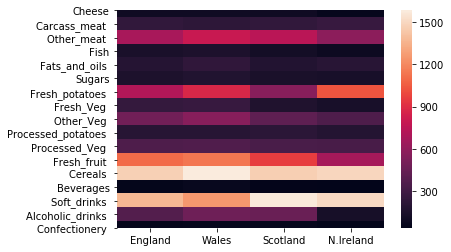

In [99]:
sns.heatmap(data)

#### Still it is not clear about eating habbits of these 4 countries

## Analyse using AutoEncoder

#### Restructre data as features in columns

In [100]:
data = data.transpose()
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [101]:
data.shape

(4, 17)

#### Data scaling

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [104]:
scaled_data.shape

(4, 17)

In [105]:
scaled_data

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

#### Build autoenocder with enocder : 17 -> 8 -> 4 -> 2  decoder: 2 ->4 -> 8 -> 17
* This will reduce feature dimentions from 17 to 2

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### Encoder

In [107]:
encoder = Sequential()
encoder.add(Dense(units = 8, activation = 'relu', input_shape = [scaled_data.shape[1]]))
encoder.add(Dense(units = 4, activation = 'relu'))
encoder.add(Dense(units = 2, activation = 'relu'))

#### Decoder

In [108]:
decoder = Sequential()
decoder.add(Dense(units = 4, activation = 'relu', input_shape = [2]))
decoder.add(Dense(units = 8, activation = 'relu'))
decoder.add(Dense(units = 17, activation = 'relu'))

#### Autoencoder

In [109]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss = 'mse', optimizer = SGD(lr = 1.5))
autoencoder.fit(scaled_data, scaled_data, epochs = 15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 174ms/sample - loss: 0.4262
Epoch 2/15
4/4 [==============================] - 0s 0s/sample - loss: 0.4202
Epoch 3/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.3266
Epoch 4/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.2857
Epoch 5/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2684
Epoch 6/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.2553
Epoch 7/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2487
Epoch 8/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2456
Epoch 9/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2443
Epoch 10/15
4/4 [==============================] - 0s 2ms/sample - loss: 0.2437
Epoch 11/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2434
Epoch 12/15
4/4 [==============================] - 0s 997us/sample - loss: 0.2433
Epoch 13/15
4/4 [==========

#### Use Encoder network to visualize reduced features

In [110]:
data_2d = encoder.predict(scaled_data)

In [111]:
data_2d

array([[0.        , 0.11852793],
       [0.        , 0.03363804],
       [0.        , 0.07349111],
       [0.12422913, 0.24949116]], dtype=float32)

#### Prepare dataframe with countries and corresponding reduced features (food preferences )

In [112]:
data_2d = pd.DataFrame(data_2d)
data_2d

,0,1
0,0.000000,0.118528
1,0.000000,0.033638
2,0.000000,0.073491
3,0.124229,0.249491


In [113]:
#Original data index
data.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [114]:
#Add country names in to dataframe
data_2d.index = data.index
data_2d.columns = ['F1', 'F2']
data_2d

,F1,F2
England,0.000000,0.118528
Wales,0.000000,0.033638
Scotland,0.000000,0.073491
N.Ireland,0.124229,0.249491


#### visualize the input data in reduced feature space

In [115]:
#Use index information as labels for scatter plot
data_2d = data_2d.reset_index()

In [116]:
data_2d

,index,F1,F2
0,England,0.000000,0.118528
1,Wales,0.000000,0.033638
2,Scotland,0.000000,0.073491
3,N.Ireland,0.124229,0.249491


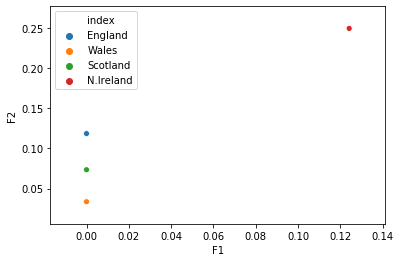

In [117]:
sns.scatterplot(x = 'F1', y = 'F2', data = data_2d, hue = 'index')

### From the plot it is very clear that N.Ireland food consumption is different from rest of the countries 

#### Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.

In [118]:
data

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### Good bye !!